# CS-EJ3211 Machine Learning with Python 

## Round 1 - Components of Machine Learning
**submission deadline 01.02.2021 23:59 Helsinki time**

<img src="../../../coursedata/R1_ComponentsML/AMLProblem.png" alt="Drawing" style="width: 600px;"/>

In general terms, machine learning (ML) is the study and application of methods that enable a computer to learn from data. By applying such methods, we aim to create a model that can make accurate predictions and/or inferences concerning real world phenomena. We might, for example, apply machine learning in an attempt to predict the grade of a cancerous tumour based on histological images or to identify different customer segments in the clientele of a shop.

In this round, we will introduce you to the basic concepts of ML and its three essential components, which are as follows:


1. **Data** that consists of basic units of information called **data points**. Data points are characterized by **features** and **labels**.


2. A **hypothesis space** that contains the set of predictor functions that a ML model can learn. 


3. A **loss function** that measures the quality of a prediction output by a predictor function.


A machine learning model learns by searching the hypothesis space for the predictor function that results in the smallest average loss on the dataset.

Alongside the theory, we present some of the basic tools in NumPy, Matplotlib, and Scikit-learn that are useful when doing ML with Python. At the end of this round, you will get to train your (possibly) first ML model related to an example problem.

## Learning Goals

* Learn to make useful definitions for what data points (examples, samples), features, and labels are in different real-life applications. 
* Learn how to represent data as NumPy arrays, which are used to represent vectors and matrices in Python.   
* Learn to use ("toy") datasets provided by the Python library `scikit-learn`. 
* Learn about the concept of hypothesis spaces. 
* Learn how to fit (linear) prediction functions to data. 

This notebook contains several student tasks requiring you to write a few lines of Python code to solve small problems. In particular, you have to fill in the gaps marked as **Student Task**.

## Additional material

<b><font size=4>Videos</font></b>

* [Data](https://youtu.be/WWYRH3x7_5M), [Hypothesis Space](https://youtu.be/CDcRfak1Mh4), [Hypothesis Space of Linear Models](https://youtu.be/Mch5hmhVuiA), [Hypothesis Space of Decision Trees](https://youtu.be/0FmaLfjAaRE), [Hypothesis Space of Deep Learning](https://youtu.be/im8mweIrpAM),[Loss Functions](https://www.youtube.com/watch?v=Uv9lihDfsBs&t=4s)

<b><font size=4>Tutorials</font></b>

* components of ML can be found under [this link](https://arxiv.org/pdf/1910.12387.pdf) 

* Python library `numpy` can be found under [this link](https://hackernoon.com/introduction-to-numpy-1-an-absolute-beginners-guide-to-machine-learning-and-data-science-5d87f13f0d51).

* "Learn the Basics" and "Data Science Tutorial" sections from [this link](https://www.learnpython.org/en/).

* a quick refresher for basic properties of matrices can be found under [this link](http://math.mit.edu/~gs/linearalgebra/linearalgebra5_1-3.pdf)
and [this link](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470549094.app1)

* mathematical notation [this link](https://en.wikipedia.org/wiki/List_of_mathematical_symbols)



## Data (Features and labels)

In machine learning, the goal is to make computers learn mathematical models from **data** that accurately predict or offer insight into the properties of real world phenomena. The data consists of atomic units of information called **data points** that represent individual observations of the phenomena we are inspecting. Each data point is characterized by a list of **features** $\left(x_1, x_2, \ldots, x_n \right)$, which are easily measurable or otherwise obtainable properties of the data points. In addition to features, data points may also have **labels** that represent higher-level information that is of predictive interest. Data that contains both the features and labels of data points is commonly called **labeled data**.

ML can *roughly* be divided into **supervised**- and **unsupervised** learning. Supervised learning is applied to problems in which we attempt to predict the label $y$ of data points based on its features, and requires access to a set of labeled data. A supervised ML model uses the labeled data points as examples to learn a predictor function $h(\mathbf{x})$ that takes the features $\mathbf{x}$ of a data point as input and outputs a predicted label $\hat{y} = h(\mathbf{x})$. The trained model can then be used to predict the labels of data points for which the true labels are unknown.

In contrast to supervised methods, unsupervised methods do not require the data to be labeled and are in general used for problems related to the structure and distribution of the data. Examples of unsupervised ML methods are clustering algorithms, which aim to identify different clusters of data points in the dataset, and generative models that are used to generate data (see [cool example](https://www.youtube.com/watch?v=kSLJriaOumA)).



### Example: Features and Labels 

Let us illustrate the main ML terminology using a concrete example. Imagine that we want to build a model for classifying songs according to their genre (such as "Pop", "Blues" or "Hip-Hop"). In this case, the **data points** are songs, with each song corresponding to a specific data point. The data points (=songs) are characterized by the **features** of the data point, which in this case are the city where the song was produced, the length of the song's lyrics, its tempo, and the power spectrum of the audio signal. The quantity of interest or **label** is in this case the genre to which the song belongs to. 

In order to train a machine learning model to predict the genre (class) of different songs (data points), we need a labeled training dataset consisting of songs for which the genre is known. This dataset can then be used as the input to a supervised ML algorithm, which learns a predictor $h(\mathbf{x}) = \hat{\mathbf{y}}$ that maps the features of a song to a predicted label.

### Representing data as Matrices and Vectors
<a id="Q1"></a>

In order to simplify the mathematical presentation as well as the technical implementation of machine learning methods, it is useful to represent data using [vectors and matrices](https://en.wikipedia.org/wiki/Matrix_(mathematics)). 

In the vectorized representation, the features of a data point are stored in a **feature vector** $\mathbf{x}$, which is a column vector

\begin{equation}
    \mathbf{x}= \begin{pmatrix}
                    x_{1} \\ x_{2} \\ \vdots \\ x_{n}
                \end{pmatrix} \in \mathbb{R}^n
\end{equation}

where $x_i, 1 \leq i \leq n,$ denotes the value of the $i$:th feature of the data point. Furthermore, we assume that the data points are indexed and denote the feature vector of the $i$:th data point by $\mathbf{x}^{(i)}, 1 \leq i \leq m$.

It is customary to store the features of the dataset in a **feature matrix** $\mathbf{X}$, in which the $i$:th row contains the feature vector of the $i$:th data point:

\begin{equation}
  \mathbf{X} = \begin{pmatrix}
                  \mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \ldots & \mathbf{x}^{(m)}
               \end{pmatrix}^T 
             = \begin{pmatrix}
                  x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
                  x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\
                  \vdots & \vdots & \ddots & \vdots \\
                  x_1^{(m)} & x_2^{(m)} & \ldots & x_n^{(m)}
               \end{pmatrix} \in \mathbb{R}^{m \times n}
\end{equation}

If the data is labeled, we store the labels of the data points in a separate **label vector** $\mathbf{y}$, which is a column vector where the $i$:th row contains the label of the $i$:th data point:

\begin{equation}
  \mathbf{y} = \begin{pmatrix}
                  y_1 \\ y_2 \\ \vdots \\ y_m 
               \end{pmatrix} \in \mathbb{R}^m
\end{equation}


#### Summary of mathematical notation:

- $m$ - number of data points
- $n$ - number of features
- $\mathbf{X}$       - upper-case bold letters denote a matrix
- $\mathbf{x}$       - lower-case bold letters denote a vector   
- $x_{i}$            - $i$:th entry of vector $\mathbf{x}$
- $\mathbf{x}^{(i)}$ - feature vector of $i$:th data point
- $x_{j}^{(i)}$      - $j$:th feature of $i$:th data point
- $\mathbb{R}$       - real numbers
- $\mathbb{R}^{n}$   - [real coordinate space](https://en.wikipedia.org/wiki/Real_coordinate_space) consisting of length-$n$ lists of real numbers 
- $\mathbb{R}^{m \times n}$ - matrices with $m$ rows and $n$ columns of real-valued numbers

### Vectors and matrices in NumPy

In NumPy, vectors and matrices (and higher dimensional tensors) are represented by `ndarray`:s. An `ndarray` object is an n-dimensional array of shape `(d_1,d_2,...,d_n)`, where `d_i` is the size of the $i$:th dimension of the array. 

For example, we can represent the label vector $\mathbf{y}$ as an `ndarray` of shape `(m,1)` and the feature matrix $\mathbf{X}$ as an `ndarray` of shape `(m,n)`,  where `m` is the number of data points and `n` the number of features.

Below, you can see how the data in the song genre example would be represented with matrices and vectors.

<img src="../../../coursedata/R1_ComponentsML/FeaturesLabels.jpg" alt="Drawing" style="width: 1000px;"/>


<a id='npDataDemo'></a>
<div class=" alert alert-info">
    
### Demo. Vectors and matrices in NumPy.  
    
In the code below, we create a couple of `ndarrays` representing vectors and matrices in NumPy and access parts of these using NumPy indexing. Notice that Python uses 0-based indexing - for example, the element in the first row and second column in a matrix is located at index `[0,1]` in the corresponding `ndarray`.
    
More information about NumPy can be found in the Round 0 notebook or [this tutorial](https://numpy.org/devdocs/user/absolute_beginners.html).
</div>

In [1]:
import numpy as np

# Create a matrix A and column vector b
A = np.array([[1,2,3],[4,5,6]])
b = np.array([[6,7,9]]).T

# Print matrices
print(f"A = \n{A}")
print(f"b = \n{b}\n")

# Use the .shape attribute to get the shapes of A and b
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}\n")

# Get the element in the second row and first column of A
print(f"A_2_1 = {A[1,0]}\n")

# Get second column of A 
print(f"Second column of A = {A[:,1]}\n")

# Get first row of A 
print(f"First row of A = {A[0]}\n")

# Get columns 2 and 3 of A
print(f"Second and third column of A =\n{A[:,1:3]}\n")

A = 
[[1 2 3]
 [4 5 6]]
b = 
[[6]
 [7]
 [9]]

Shape of A: (2, 3)
Shape of b: (3, 1)

A_2_1 = 4

Second column of A = [2 5]

First row of A = [1 2 3]

Second and third column of A =
[[2 3]
 [5 6]]



<a id='pdDataDemo'></a>
<div class=" alert alert-warning">
    
### Student task. Feature matrix in NumPy
    
This task tests your knowledge on the structure of the feature matrix $\mathbf{X}$ and array indexing in NumPy.
    
The code snippet first creates a "feature matrix" containing a range of numbers. After this, your task is to
    
- Store a vector containing the values of the first feature of the feature matrix in the variable `a`.
    
- Store the feature vector of the 10th data point in the variable `b`
    
- Store a matrix containing the 2nd and 3rd features of data points $10, 11, \ldots, 14$ in the variable `c`.
    
**Hint:** Remember that indexing starts from zero in Python! For example, the first data point is stored in the row with index 0, etc.
</div>

In [58]:
# Define the feature matrix 
X = np.arange(1,101).reshape(20,5) 

### STUDENT TASK ###
# YOUR CODE HERE
a = X[:,0]
b = X[9,:]
c = X[9:14,1:3]
#raise NotImplementedError()
print(f"Shape of X: {X.shape}")
print(f"Shape of a: {a.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of c: {c.shape}")

Shape of X: (20, 5)
Shape of a: (20,)
Shape of b: (5,)
Shape of c: (5, 2)


In [59]:
# Perform some sanity checks on the solution
assert a.shape == (20,), "The shape of a is incorrect!"
assert b.shape == (5,), "The shape of b is incorrect!"
assert c.shape == (5, 2), "The shape of c is incorrect!"

print("Sanity checks passed!")


Sanity checks passed!


### Loading datasets in NumPy with Pandas

On this course, you will learn how to solve machine learning problems using ML models implemented in the Python library **scikit-learn**, which is built on the scientific computing package **NumPy**. Hence, you will first have to load data into NumPy arrays before you can apply ML methods from scikit-learn.

In this section, you will learn how to load a dataset using Pandas and how to define the feature matrix and label vector that are used in many scikit-learn models. As an example, we will use a small dataset consisting of the weights and bench press results of students at Aalto university, and consider the weight as the feature and the bench press result as the label of the data points.

<a id='pdDataDemo'></a>
<div class=" alert alert-info">

### Demo. Loading a dataset with Pandas.  
    
The code snippet below loads the bench press dataset using the function `read_csv` in Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv)). The function creates a Pandas [DataFrame](https://www.google.com/search?q=pandas+dataframe&oq=pandas+dataframe&aqs=chrome.0.69i59j35i39j0l5j69i60.3267j0j7&sourceid=chrome&ie=UTF-8) based on the data, and uses the top row to define the column names.
    
In order to define the feature matrix `X` and label vector `y`, we first select the corresponding data from the dataframe, and then convert it into `ndarray`:s by using the `.to_numpy()` function.
</div>

In [60]:
import pandas as pd

path = "../../../coursedata/R1_ComponentsML/benchpress.csv"  # Define the file path
df = pd.read_csv(path)  # Load the data as a Pandas DataFrame

X = df['Bodyweight'].to_numpy().reshape(-1,1)  # Define the feature matrix
y = df['Benchpress'].to_numpy()  # Define the label vector

# Print first five values of X and y
print(f"First five values of X (weights of students):\n {X[:5]} \n")
print(f"First five values of y (bp results of students):\n {y[:5]}")

First five values of X (weights of students):
 [[68.72700594]
 [97.53571532]
 [86.59969709]
 [79.93292421]
 [57.80093202]] 

First five values of y (bp results of students):
 [ 45.82560525 111.9390433   80.88996529  75.52398007  37.67579885]


### Datasets in Scikit-Learn

When solving real-life ML problems, you will have to import your own data into the Python environment by using, for example, the methods shown above. However, the Python library `scikit-learn` also comes with functions for loading a few standard datasets, which can be useful for testing different ML methods or honing your ML skills. These datasets include some small built-in [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html), 
such as the [iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) and [digits](https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset) datasets for classification and the [boston house prices](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset) and [linnerud](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset) datasets for regression, but also larger [real world datasets](https://scikit-learn.org/stable/datasets/real_world.html#real-world-datasets) that are downloaded only when calling a fetching function.

The scikit-learn datasets are stored in a [`bunch` data type](https://pypi.org/project/bunch/) containing multiple key-value pairs, similar to the ones in a Python `dictionary`. The main difference between the two data types is that the `bunch` type enables accessing values through attributes named in accordance with the keys (i.e. `bunch['key'] == bunch.key`).

All scikit-learn datasets include a feature matrix with key `'data'` and a target vector with the key `'target'`, as well as a description of the dataset with the key `DESCR`. Also, the `Bunch` objects might contain other items as well, such as `feature_names` and `target_names` containing the names of the features and targets of the data points respectively. 

You can find more information about the datasets in `scikit-learn` here: https://scikit-learn.org/stable/datasets/toy_dataset.html

### Example problem: Predicting the number of chin-ups based on an athlete's weight

Now, we consider an example ML problem that we will later solve using a ML model in Scikit-learn. In this problem, our task is to predict the number of chin-ups that an athlete is able to do, based on his/her weight. Here, the data points represent athletes, the only feature is the weight of the athlete, and the label is the number of chin-ups the athlete is able to perform. The goal is to solve this problem by using ML to find a predictor function $h(x)$ that predicts the number of chin-ups based on the weight of the athlete.

We can obtain data for training our model from the **["Linnerud" dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud)**, which contains the physiological parameters (Weight, Waist, and Puls) and exercise data (Chin-ups, Situps, and Jumps) of 20 athletes. In the dataset description, the exercise data is referred to as features, while the physiological parameters are defined as the labels of datapoints (athletes). However, in practice, one can freely define which variables are features and which are labels. 

<a id='pdDataDemo'></a>
<div class=" alert alert-warning">
   
### Student task. Loading the data for chin-up prediction.  
    
In this task your objective is to create a function that returns a feature matrix `X` containing the weights (in kg) of the 20 athletes in the linnerud dataset, and a label vector `y` containing the number of chin-ups of the respective athletes. The feature matrix should be of shape `(20,1)` and the label vector of shape `(20,)`.
    
The steps you have to code are as follows:
    
- Load the linnerud data using the function `datasets.load_linnerud()` and store it in a variable named `linnerud`
    
    
- Store the athlete weights in a feature matrix `X`. The athlete weights are located in the first column of the matrix `linnerud.target`. Furthermore, convert the weights in `X` to kg by multiplying `X` with the conversion factor `CF`and reshape `X` to shape `(20,1)` by using the function `X.reshape(m,n)` with suitable arguments `m,n`
    
    
- Store the nr. of chin-ups in a label vector `y`. The nr. of chin-ups are located in the first column of the matrix `linnerud.data`
</div>

In [96]:
from sklearn import datasets

CF = 0.453

def get_chinup_data():
    ### STUDENT TASK ###
    # Load the linnerud dataset into the bunch object "linnerud"
    linnerud = datasets.load_linnerud()
    M = linnerud.target
    #X = linnerud.target[:,0] # returns a (20,) vector
    #X = X.reshape(20,1)
    # X = CF*X
    X = linnerud.target[:,:1] #returns a (20,1) matrix 
    X = CF*X

    y = linnerud.data[:,0]

    #raise NotImplementedError()
    return X, y

X, y = get_chinup_data()

In [97]:
# Perform some sanity checks on the solutions
assert X.shape == (20,1), "The shape of the feature matrix is wrong!"
assert y.shape == (20,), "The shape of the target vector is wrong!"

print("Sanity checks passed!")


Sanity checks passed!


### Visualizing Data

Before considering how machine learning models learn from data, we will briefly examine how to visualize data using the [Matplotlib](https://matplotlib.org/) library in Python. Visual exploration of the dataset is often beneficial before applying ML methods since it can aid in identifying relationships between the variables in the data.

The [scatterplot](https://en.wikipedia.org/wiki/Scatter_plot) is a particularly useful tool for visualizing a dataset containing discrete data points. The scatterplot visualizes the data with respect to two different variables and can be used to assess the relationship between a single feature and the label, or the relationship between two distinct features. Another useful plot type is the [histogram](https://en.wikipedia.org/wiki/Histogram), which is often used for visualizing the sample distribution of the data with respect to a single numerical variable.

<a id='plotpdDemo'></a>
<div class=" alert alert-info">
    
### Demo. Plotting a scatterplot with Matplotlib.  
    
In the code snippet below, we will plot a scatterplot of the weight and nr. of chin-ups of the 20 athletes in the Linnerud dataset, using the `.scatter()` function in Matplotlib.
    
You can consult the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) of `.scatter()` for information on different options available for plotting, as well as further examples that show how to create more sophisticated scatterplots. 
</div>

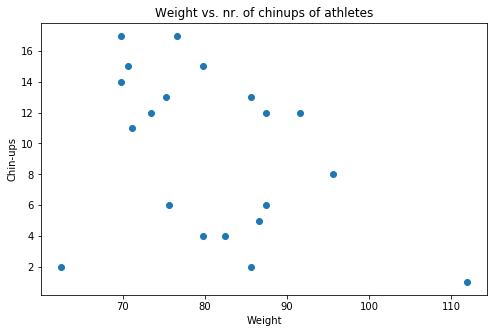

In [98]:
import matplotlib.pyplot as plt

# Load Linnerud data and select the physical attributes as the features and labels
x, y = get_chinup_data()

plt.figure(figsize=(8,5))  # Set size of figure
plt.scatter(x, y)  # Make a scatterplot of the weights vs. chin-ups
plt.title("Weight vs. nr. of chinups of athletes")  # Set title
plt.xlabel("Weight")  # Set label to x-axis
plt.ylabel("Chin-ups")  # Set label to y-axis
plt.show()

## Hypothesis Space 

When applying a ML model on labeled data, we want the model to learn a predictor function $h(\mathbf{x})$ that takes the features of a data point as input and outputs a predicted label $\hat{y}$. Ideally, we would like our ML model to be able to learn any possible function so that it can find the one that best represents the relationship between the features and the label. This is, however, impossible in practice, and therefore we have to restrict the set of functions that the ML model can learn. This restricted set of predictor functions is referred to as the **hypothesis space**.

The choice of hypothesis space corresponds to an assumption about the relationship between the features and the label of a data point. For example, by selecting the set of linear functions of the form

\begin{equation}
    h(x) = w \cdot x, \; \text{ where } w \in \mathbb{R}
\end{equation}

as the hypothesis space in the chin-up problem, we are effectively assuming that the relationship between the weight and the number of chin-ups can be approximated well using a linear function. It is important to understand that such assumptions can rarely be justified in advance, and it is in practice necessary to experiment with models using different hypothesis spaces to find the one that results in the best predictions.

### Model parameters

As per the example above, let us choose the set of linear functions

\begin{equation}
    h(x) = w \cdot x, \; \text{ where } w \in \mathbb{R}
\end{equation}

as the hypothesis space for the chin-up problem. The predictor functions take as input the weight $x$ of an athlete and return a prediction $\hat{y} = wx$ of the number of chin-ups the athlete can perform. Note that each possible value of the coefficient $w$ corresponds to a particular predictor function, and thus the learning algorithm can search for the best predictor by tuning the value of $w$.

In this example, $w$ is the sole **model parameter** of the ML model. Model parameters are variables that the learning algorithm tunes during the training process in order to find the best predictor function in the hypothesis space. Models with larger hypothesis spaces than our tiny example have a larger number of parameters. An extreme example is the [GPT-3](https://en.wikipedia.org/wiki/GPT-3) deep learning model, which has ~175 billion model parameters!

The figure below shows the optimal predictor for four polynomial hypothesis spaces, as well as the form of the predictor functions in the respective spaces. We can see that whereas the first-degree polynomials in the hypothesis space $\mathcal{H}^{(2)}$ are parametrized by the linear term $w_1$ and intercept $w_0$, the third-degree polynomials in $H^{(4)}$ are parametrized by a larger collection of parameters $(w_0, w_1, w_2, w_3)$. 

<img src="../../../coursedata/R1_ComponentsML/Hspace.jpg" alt="Drawing" style="width: 900px;"/>

<a id='HypothesisDemo'></a>
<div class=" alert alert-info">
    
### Demo. Hypothesis Space of Linear Predictor Functions.  
    
In the code below, we create a scatterplot of the body weight values and number of chin-ups of the athletes in our example problem. In addition, we plot a few of the predictor functions $h(x)=w \cdot x$ in the linear hypothesis space using certain choices of the parameter $w \in \mathbb{R}$.
</div>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 

# Load the chinup data
x, y = get_chinup_data()

# Define the coefficients w for the different predictors (0,0.05,...,0.45)
coefficients = np.linspace(0, 0.45, 10)

# Plot the datapoints and generated predictor functions from the linear hypothesis space
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Create Figure and Axes object

# Make a scatterplot of the data
axes.scatter(x, y, color='blue', label="data points") 

# Plot the predictor function for each regression coefficient w in 'coefficients'
for w in coefficients: 
    y_pred = w*x  # Calculate the predictor function
    label = f"w = {w:.2f}"  # Format the label for the legend
    axes.plot(x, y_pred, label=label)  # Plot the predictor function

axes.set_title('Several different linear predictor functions')  # Set plot title
axes.set_xlabel('body weight (kg)')  # Set x-axis label
axes.set_ylabel('number of chin-ups')  # Set y-axis label
axes.legend(loc='upper left')  # Set location of the legend to show in upper left corner
plt.show()

## Learning by Minimizing Loss

Given a set of training data, we would like our ML model to learn the predictor function in its hypothesis space that results in the best predictions $\hat{y} = h(\mathbf{x})$ on the data. We must therefore find a way to measure the quality of the predictions.

To this end, we define a **loss function** $\mathcal{L}(\hat{y}, y)$, which quantifies the quality of a single prediction $\hat{y}=h(\mathbf{x})$ by comparing it to the true label $y$ of a data point. The basic idea of a loss function is that it outputs a small loss for good predictions $\hat{y} \approx y$ and a larger loss for bad predictions.

Given a loss function, a ML model can learn the best predictor function in the hypothesis space by searching for the set of model parameters that minimize the **average loss** on the training data. The average loss is the average of the losses incurred by the individual data points in the training set:

\begin{equation}
    \mathcal{E(h(\mathbf{x}))} = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}_i, y_i)
\end{equation}

In general, we are free to define the loss function to best suit the statistical properties of the data and computational resources at hand. However, for certain classes of machine learning problems some useful choices for the loss functions have crystalized. For example, if the labels of data points take on numeric values, a widely used choice for the loss function is the **squared error loss** $(y - \hat{y})^{2}$. 

We will use this loss function to fit a linear model to the chin-up data in our example problem. In this case, learning the best predictor function corresponds to finding the value of $w$ that minimizes the **mean squared error** (MSE):

\begin{equation}
\frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^{2} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - w \cdot x^{(i)})^{2}. 
\end{equation}

<a id='FitRegressionDemo'></a>
<div class=" alert alert-info">
    
### Demo. Fitting a Linear Model to the Linnerud data.  
    
The `LinearRegression` class in Scikit-learn implements a standard linear regression model. In the code snippet below, we use this class to fit a linear regression model without an intercept to the Linnerud data, and use the fitted model to calculate the predicted labels for the training data.
    
The steps we take are the following:
    
- First, we create an instance of the `LinearRegression` class. This is done with the statement `LinearRegression(...)`. When creating this object, we can pass different parameters to the constructor that will affect the functionality of the model. For example, the parameter `fit_intercept` determines whether or not the model includes an intercept in its predictor functions
    
    
- After creating the object and storing it in a variable `reg`, we train the model on the features `X` and labels `y` by calling the function `reg.fit(X, y)`. This function takes the feature matrix and label vectors as arguments, and calculates the optimal model parameters. The optimal regression weights (coefficients) are stored in the `.coef_` attribute of the object.
    
    
- Finally, we use the function `reg.predict(X)` to calculate the predicted labels for the training data. The predicted labels are calculated using the optimal weight `w_opt` that was stored in the `.coef_` attribute after fitting the model.
    
The documentation of the linear regression class can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
</div>

In [99]:
from sklearn.linear_model import LinearRegression  

reg = LinearRegression(fit_intercept=False)  # Initialize the Linear Regression model
reg.fit(x, y)  # Fit the linear regression model using "x" and "y" variables
y_pred = reg.predict(x)  # Make predictions based on the fitted model
w_opt = reg.coef_[0]  # Get the optimal regression coefficient

# Print weight of the optimal predictor 
print("Optimal weight w =", w_opt)

Optimal weight w = 0.11143528587026878


Next, we plot the data points along with the optimal predictor function of the model and the predicted labels. Furthermore, we indicate the prediction errors $y-\hat{y}$ with red bars.

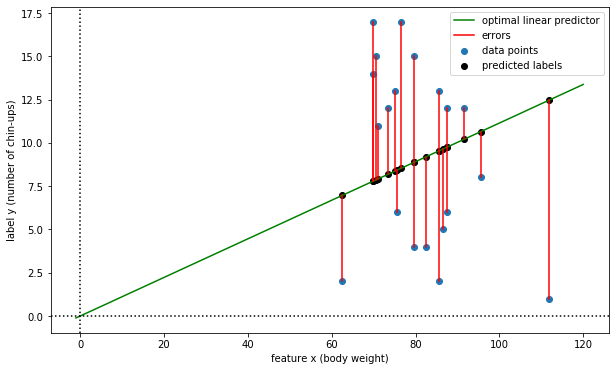

In [100]:
# Create a grid of test feature values 
x_grid = np.linspace(-1, 120, num=100).reshape(-1,1) 
# Compute predictions from linear regression model without intercept term 
y_grid = reg.predict(x_grid) 

fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Create Figure and Axis objects and set figure size
axes.scatter(x, y, label='data points')  # Make a scatterplot of the weights vs. the nr. of chin-ups
axes.scatter(x, y_pred, label='predicted labels', color='black')  # Plot the predicted labels
axes.plot(x_grid, y_grid, color='green', label='optimal linear predictor')  # Plot the linear predictor

# Plot prediction errors
axes.plot((x[0], x[0]), (y[0], y_pred[0]), color='red', label='errors')  # Add label to legend
for i in range(len(x)-1):  # Loop through range length of x - 1
    lineXdata = (x[i+1], x[i+1])  # Make tuples with same x
    lineYdata = (y[i+1], y_pred[i+1])  # Make tuples with different y's
    axes.plot(lineXdata, lineYdata, color='red')  # Add the red lines to the plot to indicate error distance from our predicted regression model

axes.axhline(y=0, color='k', linestyle=':')  # Add a dotted line to the plot
axes.axvline(x=0, color='k', linestyle=':')  # Add a dotted line to the plot
    
axes.legend(loc='upper right')  # Add legend to the upper right corner
axes.set_xlabel("feature x (body weight)")  # Set label for x-axis
axes.set_ylabel("label y (number of chin-ups)")  # Set label for y-axis
plt.show()

### Adding an Intercept Term 

From the figure above, we can identify a significant issue with the current hypothesis space consisting of functions $h(x) = wx$. Namely, that for all functions $h(0)=0$, i.e., the functions always cross the origin. This severely restricts linear functions the ML model can learn, and in this particular problem, prohibits learning any function with a negative relationship between the weight and chin-ups.

We can solve this issue by selecting a different hypothesis space for our model. Specifically, we select a model that uses predictor functions of the form 

\begin{equation}
h(x) = w \cdot x + b, 
\end{equation}

which contain a weight $w$ and an intercept term $b$. By including the intercept term, we allow the predictor functions to cross (intercept) the y-axis at any value $b$ on the axis since $h(0)=b$. Observe that this model has two model parameters - $w$ and $b$. Thus, the model is fitted by minimizing the average squared error of $h(x)$ with respect to both $w$ and $b$.

When including an intercept term, the hypothesis space contains all possible linear functions, instead of only those that cross the origin. Thus, it is always preferable to include the intercept term, except for rare cases where we know in advance that the regression line must pass through the origin. 

<a id='QuestionR1_1'></a>
<div class=" alert alert-warning">
    
### Student Task. Fitting a Linear Model with and without an intercept. 

Your task is to fit two linear regression models to the Linnerud data, one with an intercept term and one without. The inclusion of the intercept term is controlled by the parameter `fit_intercept` (`LinearRegression(fit_intercept=...)`), which takes a boolean value (`True` or `False`) that indicates whether the intercept is included.
    
In addition, you should find the optimal weight $w_{\rm opt}$ for the model without intercept and store it in the variable `w_opt`, and find the optimal weight and intercept for the model with an intercept and store these in the variables `w_opt_intercept` and `intercept` respectively.
    
The necessary steps for fitting each model are presented in detail in the previous demo.
</div>

In [104]:
x, y = get_chinup_data()

### STUDENT TASK ###
# Linear Regression model without an intercept
reg =  LinearRegression(fit_intercept=False)
reg.fit(x, y)
#
reg.coef_[0]
#
# Linear Regression model with an intercept term 
reg_intercept =  LinearRegression(fit_intercept=True)
reg_intercept.fit(x, y)
w_opt_intercept = reg_intercept.coef_[0]
intercept = reg_intercept.intercept_
#
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()

# Print parameters of the optimal predictors
print(f"model without intercept: optimal weight w_opt = {w_opt}")
print(f"model with intercept: optimal weight w_opt_intercept = {w_opt_intercept} and intercept = {intercept}")

model without intercept: optimal weight w_opt = 0.11143528587026878
model with intercept: optimal weight w_opt_intercept = -0.18418114215330775 and intercept = 24.351322650827086


In [105]:
# Perform sanity check on the results
assert w_opt < 1, "w_opt value is wrong"
assert w_opt_intercept < 50, "w_opt_intercept value is wrong"
assert intercept > -400, "intercept value is wrong"
assert intercept !=0, "intercept value is wrong"

print('Sanity checks passed!')


Sanity checks passed!


Next, we will plot a figure of the linnerud data and the optimal predictors found in the previous task.

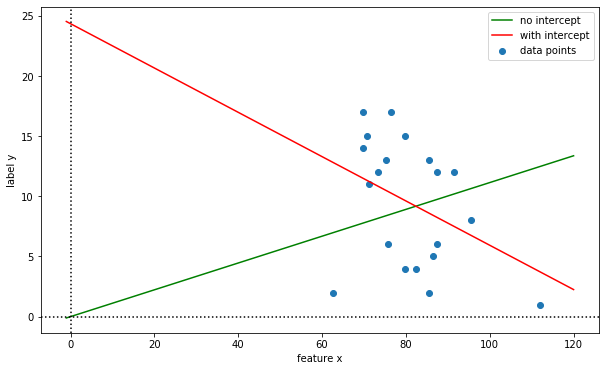

In [106]:
# Create a grid of test feature values  
x_grid = np.linspace(-1, 120, num=100).reshape(-1,1) 
# Compute predictions from linear regression model without intercept term 
y_pred = reg.predict(x_grid) 
# Compute predictions on test feature values using linear regression model with intercept term 
y_pred_intercept = reg_intercept.predict(x_grid)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Initialize subplots and get "fig" and "axes" variables
axes.scatter(x, y, label='data points')  # Create a scatter plot of the chin-up data
axes.plot(x_grid, y_pred, color='green', label='no intercept')  # Add a line to the plot
axes.plot(x_grid, y_pred_intercept, color='red', label='with intercept')  # Add a line to the plot

axes.legend() # Add a legend to the plot
axes.set_xlabel("feature x")  # Add x-axis label to the plot 
axes.set_ylabel("label y")  # Add y-axis label to the plot
axes.axhline(y=0, color='k', linestyle=':')  # Add a dotted line to the plot
axes.axvline(x=0, color='k', linestyle=':')  # Add a dotted line to the plot
plt.show()

By observing the figure above, we can see that the inclusion of the intercept leads to very different results and conclusions in the chin-up problem. While the model without the intercept seemed to suggest that heavier athletes are, on average, able to do more chin-ups than their lighter counterparts, the model with the intercept suggests the opposite. So which model is more likely to be correct?

Even without explicitly calculating the training error, we are able to assert that model with the intercept fits the training data better. This is due to the fact that the intercept model is trained by minimizing the MSE with respect to both $w$ and $b$, whereas the other model only minimizes with respect to $w$. If the optimal linear predictor would cross the origin, the learning algorithm used to train the intercept model would find the optimal value of $b$ to be $b=0$ and both models would result in the same predictor. Since this is not the case, we know that the intercept model fits better!

## Key takeaways

- An ML model can be decomposed into three components: The data, the hypothesis space, and the loss function


- Data consists of data points, which are characterized by its features and label(s)


- The hypothesis space consists of the predictor functions that a ML model can learn. ML models have a restricted hypothesis space since it is not computationally feasible to search for the best predictor out of all possible functions


- The loss function measures the quality of a prediction $\hat{y} = h(\mathbf{x})$ by comparing it to the true label of the data point.


- A ML model learns by searching its hypothesis space for the predictor function that minimizes the average loss on the labeled dataset used for training the model.

## Quiz Questions

<a id='QuestionR1_1'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.1. 

Assume you want to classify pictures into three categories (or classes) "Dogs", "Birds" and "Fish". Which of the following option could be used to formalize the application as a machine learning problem.

<ol>
  <li>Data points are pictures of Animals. Features are [Dog, Bird, Fish].  Labels are number of legs, number of wings, number of fins.</li>
  <li>Data points are pictures of Animals. Features are number of legs, number of wings, number of fins. Labels are [Dog, Bird, Fish].</li>
  <li>Data points are number of legs, number of wings, number of fins.  Features are pictures of animal habitat (forest, sea, sky). Labels are [Dog, Bird, Fish].</li>
</ol> 

</div>

In [108]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R1_Q1  = 2

# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# This cell is for tests

assert answer_R1_Q1 in [1,2,3], '"answer_R1_Q1" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


<a id='QuestionR1_2'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.2. 

<p>Consider data points having features $\mathbf{x}$ and a numeric label $y$. How can the quality of a predictor function $h(\mathbf{x})$, which delivers a predicted label $\hat{y}=h(\mathbf{x})$ be measured to choose the best predictor function?</p>


<ol>
  <li>Use the difference between our predicted value $\hat{y}$ and true label $y$, i.e: $y - \hat{y}$ and pick the predictor function with the lowest value of loss.</li>
  <li>Use the squared error loss $(y - \hat{y} )^{2}$ and pick the predictor function with the highest value of squared error loss.</li>
  <li>Use the squared error loss $(x - \hat{x})^{2}$ and pick the predictor function with the lowest value of squared error loss.</li>
  <li>Use the squared error loss $(y - \hat{y})^{2}$ and pick the predictor function with the lowest value of the squared error loss.</li>
</ol> 

</div>

In [110]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R1_Q2  = 4

# YOUR CODE HERE
#raise NotImplementedError()

In [111]:
# This cell is for tests

assert answer_R1_Q2 in [1,2,3,4], '"answer_R1_Q2" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR1_3'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.3. 

<p> Consider a set of $m=3$ data points represented by the feature vectors $\mathbf{x}^{(1)}=\big(1,0,0,0\big)^{T}$, $\mathbf{x}^{(2)}=\big(1,0,1,0\big)^{T}$ and $\mathbf{x}^{(3)}=\big(1,0,-1,0\big)^{T}$. What is $x^{(2)}_{3}$ ? </p>

<ol>
  <li>1 </li>
  <li>0</li>
  <li>-1</li>
</ol> 

</div>

In [114]:
# STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R1_Q3  = 1

#raise NotImplementedError()

In [115]:
# This cell is for tests

assert answer_R1_Q3 in [1,2,3], '"answer_R1_Q3" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!
